In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [7]:
data.size

1000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**There are no null values but still we with one more command**

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
X = data.iloc[:,[3,4]].values

In [12]:
"""[Starting row: ending row, [3rd col, 4 col]]"""
"""[start row: end row, start col: end col]"""

'[start row: end row, start col: end col]'

In [13]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
#choosing the no. of clusters

In [ ]:
"Wcss = within cluster square values"
#it tneds to find distance between each datapoint and centroid
#each cluster has a centroid, a center
#wcss value should be very less
#i.e. distance of data points from the centroid should be less

In [ ]:
#elbow method or finding wcss value for different number of clusters

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)   #k-means++ is an initiation step there are more initiation step as froggy init, random particle init
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   #this give wcss values for each cluster


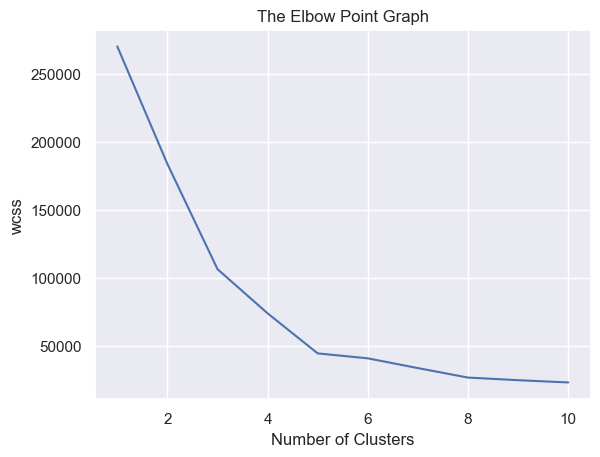

In [18]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [19]:
#optimum number of cluster = 5
#to find optimum number of clusters we need to select the point after which there is no big drop in the elbow graph
#for example in this case after cluster 5 there is no significant drop


In [20]:
#training the model

kmeans = KMeans(n_clusters=5,init="k-means++",random_state=0)

# return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [21]:
#provided X for the prediction, we got our output Y which has numbers [0,1,2,3,4] now these numbers represent 5 clusters

In [22]:
#visualizing all the clusters


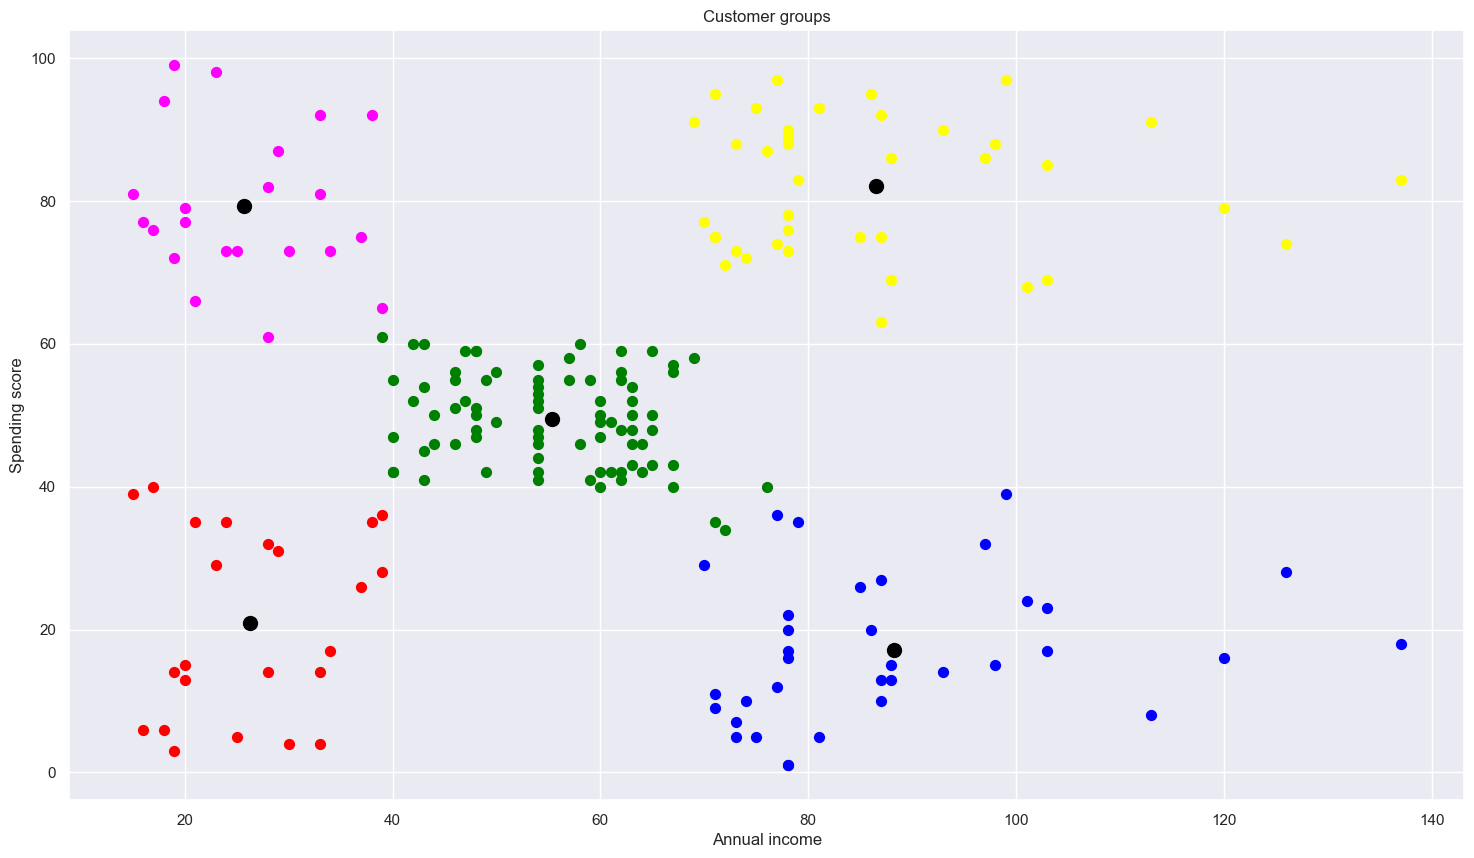

In [28]:
plt.figure(figsize=(18,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green",label='cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="yellow",label='cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="blue",label='cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="red",label='cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="magenta",label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label="Centroids")
plt.title('Customer groups')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.show()

In [29]:
from IPython.display import display
from PIL import Image

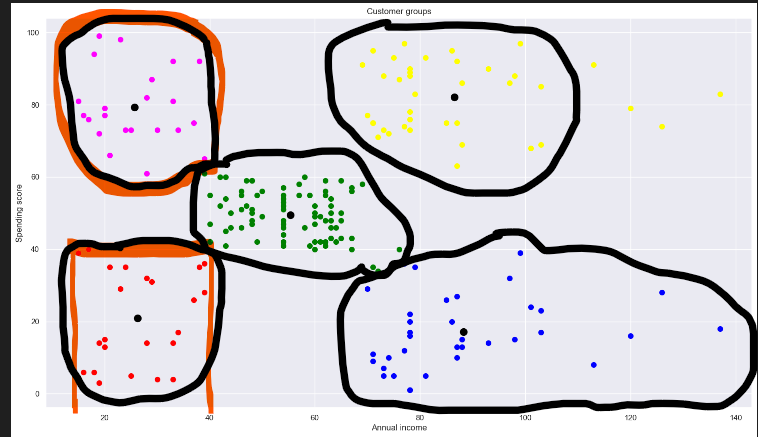

In [32]:
image_path = 'observations.png'  # or .png, .jpeg, etc.
image = Image.open(image_path)
if image.mode == 'RGBA':
    image = image.convert('RGB')

# Display the image
display(image)


These are the small insights we can make from the above plotting
it hsows that people with annual income between 10-40 thousand dollars has a less spending value but few customers from the same range has high spending value

people having annual income in the range of 40-80 thousand dollar has a spending value between 40-60
and people with annual income in the range of 70-130 thousand $ has a spending values between 0-40 meanwhile in the same range of annual income few people have spending values above 80

In [ ]:
#prediction for a new data

In [39]:
#enter annual income and spending value
X=[[60,30],[30,10],[60,70],[80,40],[50,20]]

Y = kmeans.fit_predict(X)
print(Y)
# Cluster descriptions based on labels
for i in Y:
    if i == 4:
        print("Person is in 5th cluster i.e., has high spending value")
    elif i == 3:
        print("Person is in 4th cluster i.e., has low spending value")
    elif i == 2:
        print("Person is in 3rd cluster i.e., has medium spending value")
    elif i == 1:
        print("Person is in 2nd cluster i.e., has high spending value")
    elif i == 0:
        print("Person is in 1st cluster i.e., has low spending value")

[4 1 0 2 3]
Person is in 5th cluster i.e., has high spending value
Person is in 2nd cluster i.e., has high spending value
Person is in 1st cluster i.e., has low spending value
Person is in 3rd cluster i.e., has medium spending value
Person is in 4th cluster i.e., has low spending value
